In [27]:
from process import *
from plots import *
from supports import *
from plotsettings import *

import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

In [28]:
# Please find the appended folders, whose names are like "data_200223_xxxxxx_res_cond_wsb0.xxxx"

A = "data_200223_175959_res_cond_wsb0.0037"
B = "data_200223_185233_res_cond_wsb0.004"
C = "data_200223_190842_res_cond_wsb0.0049"
D = "data_200223_192609_res_cond_wsb0.0061"
E = "data_200223_194306_res_cond_wsb0.0075"
F = "data_200223_200510_res_cond_wsb0.0089"

In [29]:
quants = ['times', 'expect', 'e0', 'g1', 'e1', 'g0']
Atimes, _, _, _, _, Ae1, Ag0, _ = load_data(quants, A)
Btimes, _, _, _, _, Be1, Bg0, _ = load_data(quants, B)
Ctimes, _, _, _, _, Ce1, Cg0, _ = load_data(quants, C)
Dtimes, _, _, _, _, De1, Dg0, _ = load_data(quants, D)
Etimes, _, _, _, _, Ee1, Eg0, _ = load_data(quants, E)
Ftimes, _, _, _, _, Fe1, Fg0, _ = load_data(quants, F)

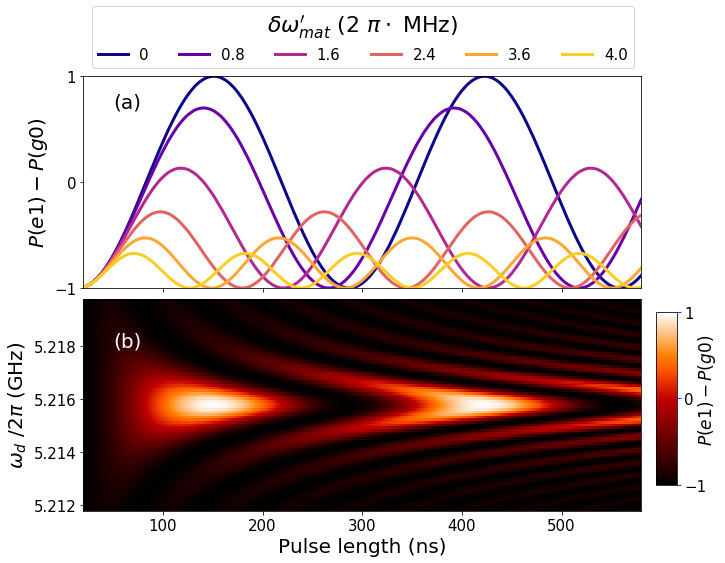

In [30]:
cols = plt.cm.plasma([0, 0.2, 0.4, 0.6, 0.8, 0.9]) 

fig, _ = plt.subplots(2, 1, figsize=(10,8))
# plt.suptitle("The sideband resonance condition search")

plt.subplot(2, 1, 1)
plt.plot(Atimes,Ae1-Ag0, ls=linestyles['larger'], c=cols[0], lw=3, label='0')
plt.plot(Btimes,Be1-Bg0, ls=linestyles['larger'], c=cols[1], lw=3, label='0.8')
plt.plot(Ctimes,Ce1-Cg0, ls=linestyles['larger'], c=cols[2], lw=3, label='1.6')
plt.plot(Dtimes,De1-Dg0, ls=linestyles['larger'], c=cols[3], lw=3, label='2.4')
plt.plot(Etimes,Ee1-Eg0, ls=linestyles['larger'], c=cols[4], lw=3, label='3.6')
plt.plot(Ftimes,Fe1-Fg0, ls=linestyles['larger'], c=cols[5], lw=3, label='4.0')
plt.legend(loc=4,bbox_to_anchor=(1, 1),fontsize=15,ncol=6, title='$\delta \omega^{\prime}_{mat}$ (2 $\pi \cdot$ MHz)')

plt.xlim([20, 580])
plt.ylim([-1, 1])
plt.yticks([-1,0,1],fontsize=15)
plt.text(50,0.7,'(a)',fontsize=20)
plt.gca().set_xticklabels([])
plt.ylabel("$P(e1) - P(g0)$",fontsize=20)

plt.subplot(2, 1, 2)
chev = plt.pcolor(np.linspace(20, 580, 580), wd_list/2/pi, np.asarray(e1g0), cmap='gist_heat')
plt.clim(-1, 1)
plt.text(50,5.218,'(b)',fontsize=20,color='w')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("$\\omega_d$ $/2\\pi$ (GHz)",fontsize=20)
plt.xlabel("Pulse length (ns)",fontsize=20)

cb_ax = fig.add_axes([0.92, 0.17, 0.03, 0.3])
cbar = fig.colorbar(chev, cax=cb_ax)
cbar.set_ticks([-1, 0, 1])
cbar.ax.tick_params(labelsize=15, color='b')
cbar.set_label("$P(e1) - P(g0)$", labelpad=-10, y=0.55, rotation=90,fontsize=17)

plt.subplots_adjust(hspace=0.05)
plt.show()